In [1]:
!pip install stylecloud

     |████████████████████████████████| 262 kB 530 kB/s eta 0:00:01
     |████████████████████████████████| 161 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 817 kB/s eta 0:00:01
     |████████████████████████████████| 87 kB 765 kB/s eta 0:00:01
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=8c93be4be9c293dc26ab934011cf1802139c6a369d45769b6322e53748da2cb4
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=5819cc5f69cef40e72f741ccc60df70d480701c3ec92b7ae404adcaf72887e75
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=77d61ea735b4361c627b6b74fd9479743ea99843fbffb76922c860a9439e0716
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/

# Covid-19 Analysis India

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import stylecloud as sc
from IPython.display import Image

In [3]:
dataset = pd.read_csv('../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
dataset.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.306815e+05,8599.305556,9.097104e+05,12371.805556,1.111389,97.620278,1.267222
std,1.376378e+06,28560.135752,1.336378e+06,23784.824599,3.101292,2.982404,0.568057
min,7.600000e+03,0.000000,7.458000e+03,4.000000,0.000000,81.090000,0.040000
25%,8.101175e+04,136.750000,7.380750e+04,815.750000,0.037500,97.637500,0.955000
50%,4.732740e+05,438.500000,4.637270e+05,5470.000000,0.470000,98.280000,1.300000
75%,1.009009e+06,4956.250000,9.953420e+05,13691.750000,0.742500,98.660000,1.575000
max,6.524498e+06,167578.000000,6.340723e+06,138546.000000,18.590000,99.960000,2.740000


In [6]:
dataset.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7600,13,7458,129,0.17,98.13,1.70
1,Andhra Pradesh,2039529,14388,2011063,14078,0.71,98.60,0.69
2,Arunachal Pradesh,54126,410,53444,272,0.76,98.74,0.50
3,Assam,598423,4984,587632,5807,0.83,98.20,0.97
4,Bihar,725901,69,716173,9659,0.01,98.66,1.33


## Total cases by state

In [7]:
px.bar(dataset, x='State/UTs', y='Total Cases', color='Total Cases', height = 800)

## Total deaths by State

In [8]:
px.pie(dataset, values='Deaths', names= 'State/UTs', title = 'Total deaths by state', height = 700)

## Total discharged by state

In [9]:
px.bar(dataset, x='State/UTs', y='Discharged', color='Discharged', height = 700)

## Active cases by state

In [10]:
px.bar(dataset, x='State/UTs', y='Active', color='Active', height = 700)

## Top states by total cases

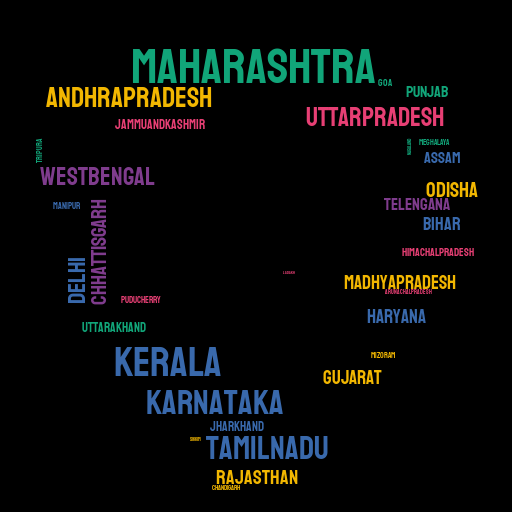

In [11]:
top_list_states = dataset.sort_values('Total Cases',ascending=False)['State/UTs'].tolist()
top_list_cases = dataset.sort_values('Total Cases',ascending=False)['Total Cases'].tolist()
top_states = []
for state, case in zip(top_list_states, top_list_cases):
        temp_lis = state.split(" ")
        scaled_case = int(case/10000)
        top_states.append(("".join(temp_lis) + " ") * scaled_case)
text = str(top_states)
top_file = open('top.txt', 'w')
top_file.write(text)
top_file.close()
sc.gen_stylecloud(file_path='top.txt', icon_name= 'fas fa-shield-virus', collocations=False, background_color='black', output_name = 'top_states.png')
Image(filename='top_states.png') 